<a href="https://colab.research.google.com/github/manthandas/airbnb-bookings-analysis-EDA-project/blob/main/airbnb_bookings_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Project/Airbnb NYC 2019.csv')
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
airbnb_df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
rename_column = {'id':'listing_id', 'name':'listing_name', 'number_of_reviews':'total_reviews', 'calculated_host_listings_count':'host_listings_count'}

In [ ]:
airbnb_df = airbnb_df.rename(columns = rename_column)
airbnb_df.head(10)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
airbnb_df.shape

(48895, 16)

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [ ]:
airbnb_df = airbnb_df.drop_duplicates()
airbnb_df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

In [ ]:
airbnb_df['listing_name'].fillna('unknown', inplace = True)
airbnb_df['host_name'].fillna('no_name', inplace = True)

In [ ]:
airbnb_df[['host_name', 'listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

In [ ]:
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].replace(to_replace = np.nan, value = 0).astype('int64')
airbnb_df['reviews_per_month'].isnull().sum()

0

In [ ]:
airbnb_df.sample(10)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
46932,35493162,Luxury Apartment in Amazing Williamsburg! Slee...,259662705,Elay,Brooklyn,Williamsburg,40.71324,-73.94271,Entire home/apt,184,3,1,2019-06-11,1,1,217
799,285492,Amazing 1 bedroom apt with NYC View,1486034,Eric,Manhattan,Chelsea,40.74494,-73.99980,Entire home/apt,385,1,63,2018-08-03,0,1,364
18683,14787061,Harlem River,92324633,Ermanno,Manhattan,East Harlem,40.81344,-73.93454,Private room,100,2,7,2017-09-04,0,1,32
494,173742,"Elegant 2-BR duplex, Union Square",829652,Donna,Manhattan,Gramercy,40.73476,-73.98452,Entire home/apt,400,2,105,2019-06-23,1,1,304
25740,20600247,EXTRAVAGANT RESORT In the ❤️ of Midtown 45 Resort,64065593,ResortShare5,Manhattan,Midtown,40.75300,-73.97364,Private room,252,2,3,2018-10-20,0,13,327
7833,5990045,"As seen on Netflix! Bright, 3-bedroom in Red Hook",12411178,Brandon,Brooklyn,Red Hook,40.67477,-74.01046,Entire home/apt,350,2,71,2019-06-13,1,1,287
23767,19194997,Murray Hill Bedroom. Comfortable and Convenient,71203979,Peter,Manhattan,Kips Bay,40.74507,-73.97920,Private room,76,2,0,NaN,0,1,0
48477,36278924,"Clean & Spacious 2 BR in DwnTwn NYC, Walk to U...",272856249,Alex,Manhattan,Gramercy,40.73258,-73.98190,Entire home/apt,300,10,0,NaN,0,1,33
33898,26845561,The Unique Home in New York City,78643953,Daniel,Brooklyn,Bushwick,40.68875,-73.91600,Entire home/apt,159,3,20,2019-07-01,3,2,258
19482,15546982,Chill in Downtown Brooklyn Clinton Hill Pratt ...,100718,Brian,Brooklyn,Clinton Hill,40.69278,-73.96500,Entire home/apt,95,1,13,2019-06-23,0,1,0


In [ ]:
airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


In [ ]:
# 1. distribution of price range in Airbnb Bookings

def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)

  return lower_range, upper_range

In [ ]:
lower_bound, upper_bound = iqr_technique(airbnb_df['price'])
airbnb_df = airbnb_df[(airbnb_df.price > lower_bound) & (airbnb_df.price < upper_bound)]

In [ ]:
print(airbnb_df['price'].max())

333


Text(0.5, 1.0, 'Distribution of AirBnB Prices')

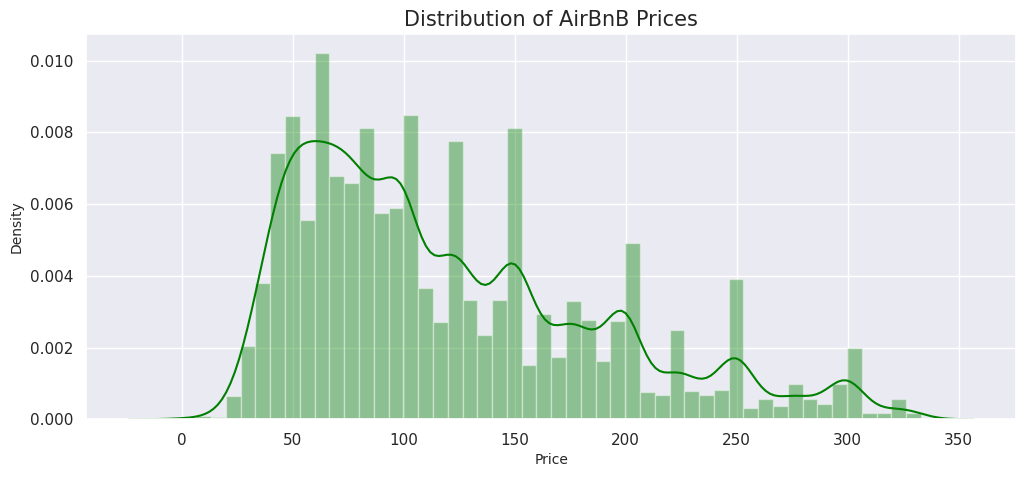

In [ ]:
mpl.figure(figsize = (12, 5))

sb.set_theme(style = 'darkgrid')

sb.distplot(airbnb_df['price'], color = ('#008000'))

mpl.xlabel('Price', fontsize = 10)
mpl.ylabel('Density', fontsize = 10)

mpl.title('Distribution of AirBnB Prices', fontsize = 15)

In [ ]:
# 2. no. of hosts per location

HostsPerLoc = airbnb_df.groupby('neighbourhood_group')['listing_id'].count().reset_index()

HostsPerLoc.columns = ['Neighbourhood_Groups', 'Host_counts']

HostsPerLoc

,Neighbourhood_Groups,Host_counts
0,Bronx,1070
1,Brooklyn,19415
2,Manhattan,19501
3,Queens,5567
4,Staten Island,365


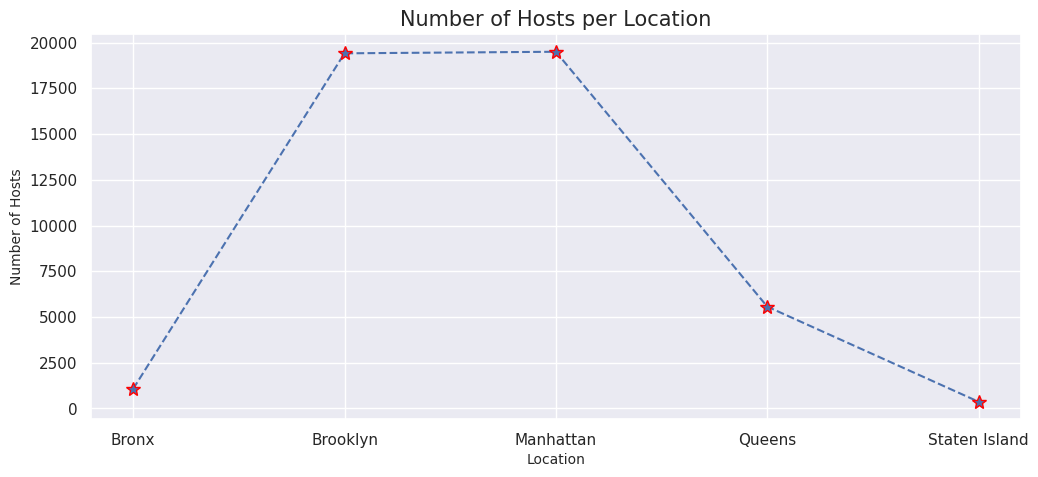

In [ ]:
HostsPerLoc = airbnb_df['listing_id'].groupby(airbnb_df['neighbourhood_group']).count()

locations = HostsPerLoc.index
host_counts = HostsPerLoc.values

mpl.figure(figsize = (12, 5))
mpl.plot(locations, host_counts, marker = '*', markersize = 10, markeredgewidth = 1, markeredgecolor = '#ff0000', linestyle = '--')


mpl.title('Number of Hosts per Location', fontsize = 15)
mpl.xlabel('Location', fontsize = 10)
mpl.ylabel('Number of Hosts', fontsize = 10)

mpl.show()

In [ ]:
# 3. average price of each neighborhood group

grouped = airbnb_df.groupby("neighbourhood_group").mean()

avg_price_of_neighbourhood_group = grouped.reset_index()

avg_price_of_neighbourhood_group = round(avg_price_of_neighbourhood_group.rename(columns={"price": "avg_price"}),2)

avg_price_of_neighbourhood_group[['neighbourhood_group', 'avg_price']].head()

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


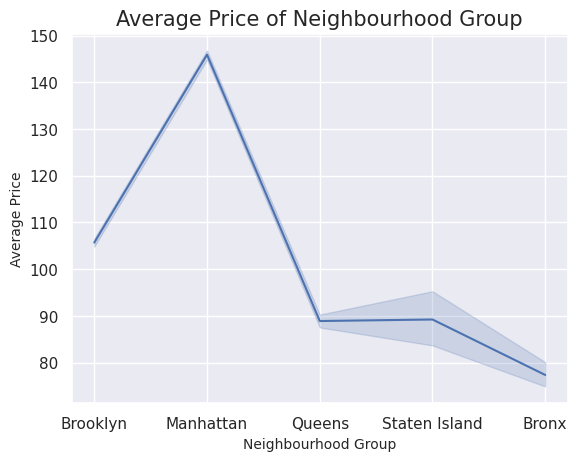

In [ ]:
# 3(a). lineplot

sb.lineplot(x = 'neighbourhood_group', y = 'price', data = airbnb_df, estimator = np.mean)

mpl.xlabel('Neighbourhood Group', fontsize = 10)
mpl.ylabel('Average Price', fontsize = 10)
mpl.title('Average Price of Neighbourhood Group', fontsize = 15)
mpl.show()

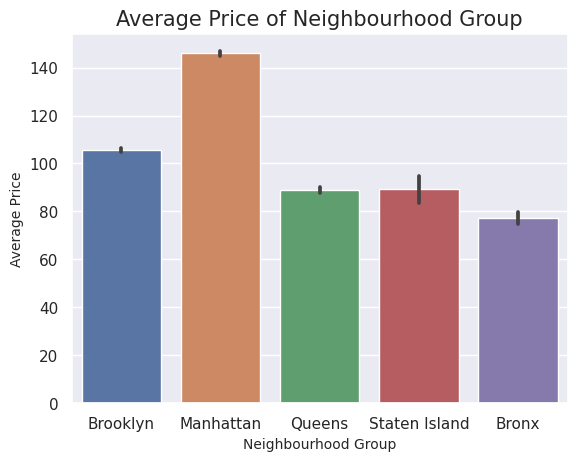

In [ ]:
# 3(b). barplot

sb.barplot(x = 'neighbourhood_group', y = 'price', data = airbnb_df, estimator = np.mean)

mpl.xlabel('Neighbourhood Group', fontsize = 10)
mpl.ylabel('Average Price', fontsize = 10)
mpl.title('Average Price of Neighbourhood Group', fontsize = 15)
mpl.show()

In [ ]:
# 4. top 10 neighborhoods as per listing/property

TopNeighbourhoods = airbnb_df['neighbourhood'].value_counts()[:10].reset_index()

TopNeighbourhoods.columns = ['Top_Neighborhoods', 'Listing_Counts']

TopNeighbourhoods

,Top_Neighborhoods,Listing_Counts
0,Williamsburg,3732
1,Bedford-Stuyvesant,3638
2,Harlem,2585
3,Bushwick,2438
4,Upper West Side,1788
5,Hell's Kitchen,1731
6,East Village,1714
7,Upper East Side,1670
8,Crown Heights,1519
9,Midtown,1143


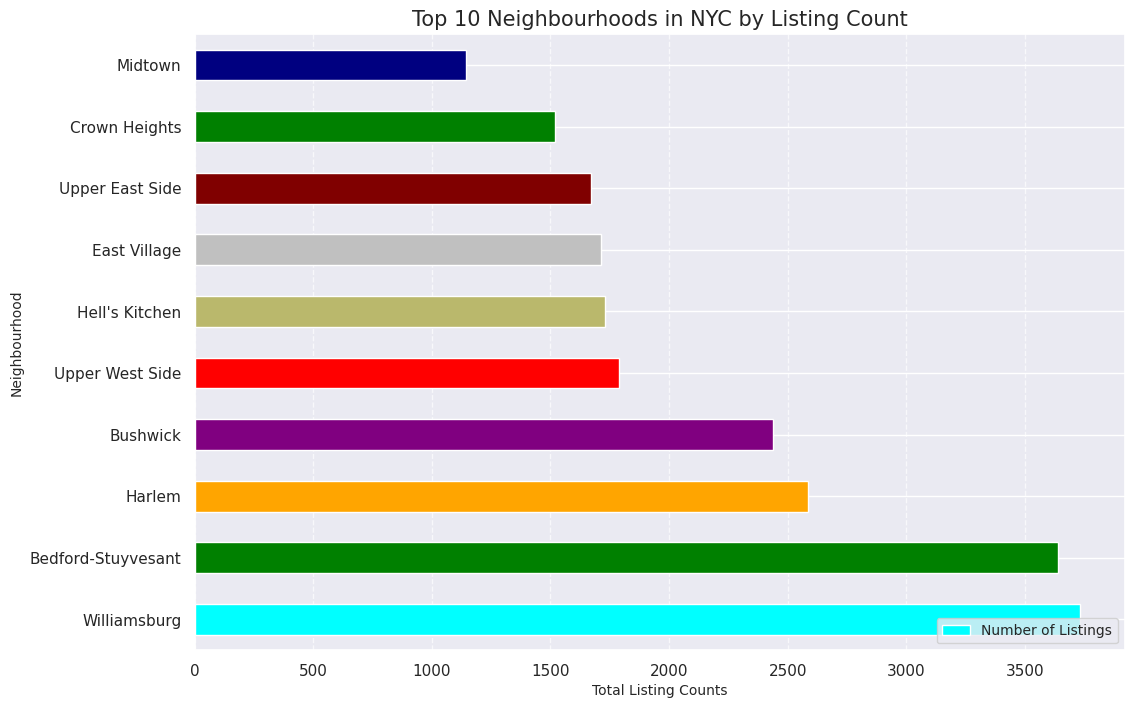

In [ ]:
Top10_Neighbourhoods = airbnb_df['neighbourhood'].value_counts().nlargest(10)

colors = ['#00FFFF', '#008000', '#FFA500', '#800080', '#ff0000', '#BAB86C', '#C0C0C0', '#800000', '#008000', '#000080']

Top10_Neighbourhoods.plot(kind = 'barh', figsize = (12, 8), color = colors)


mpl.xlabel('Total Listing Counts', fontsize = 10)
mpl.ylabel('Neighbourhood', fontsize = 10)


mpl.title('Top 10 Neighbourhoods in NYC by Listing Count', fontsize = 15)


mpl.grid(axis = 'x', linestyle = '--', alpha = 0.7)
mpl.legend(['Number of Listings'], loc = 'lower right', fontsize = 10)

mpl.show()